In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path
sys.path.insert(0, str(Path().resolve().parent))

#### np.trapz vs np.sum for integration - why did I get error $\sim \mathcal{O}\left(\Delta x\right)$ using np.trapz compared to $\sim \mathcal{O}\left(\Delta x^2\right)$ using np.sum?

Basics. I want to compute the integral $I = \int_a^bf(x) dx$, but I only provide a discrete set of points $x_i, \quad i \in \{0, 1, ..., N\}$

np.sum performs this approximation: $I \approx \sum_{i=0}^{N} f(x_i) \Delta x$. This is the rectangle rule. We have equal weighting on ALL points.

In contrast, np.trapz performs the trapezoidal rule. It approximates the integral as: $I \approx \frac{\Delta x}{2}(f(x_0) + 2f(x_1) + 2f(x_2) + ... + 2f(x_{N-1} + f(x_N))$.) We have half weighting on the boundaries and unitary weighting on all internal points.

Let me just visualise what is happening by plotting the areas that are being used to approximate by each of these methods.

/var/folders/l5/rhh7z5c528b5hjwqy30m3vzr0000gn/T/ipykernel_32475/2787895227.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_trapz = np.trapz(f_vals, x)


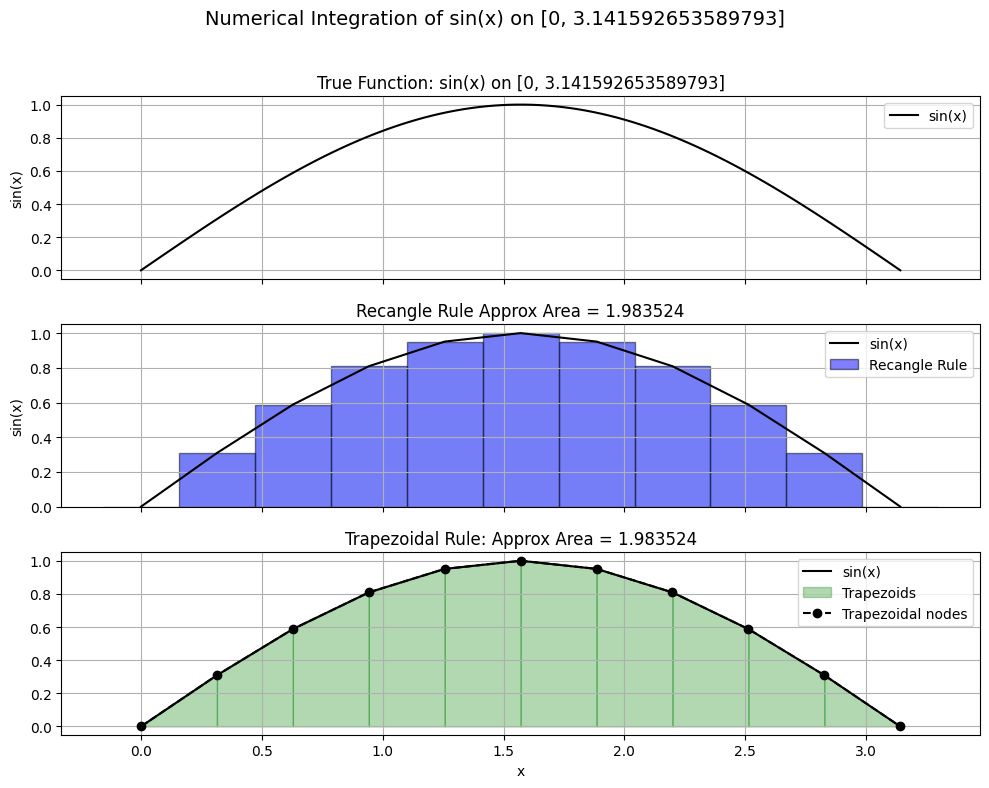

In [13]:
def plot_integration_methods(f, a, b, N=10, func_label='f(x)'):
    x = np.linspace(a, b, N + 1)
    dx = x[1] - x[0]
    f_vals = f(x)

    # Rectangle rule approximation
    area_sum = np.sum(f_vals) * dx

    # Trapz approximation
    area_trapz = np.trapz(f_vals, x)

    # Plotting
    fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

    # True function plot
    axs[0].plot(np.linspace(a, b, 100), f(np.linspace(a, b, 100)), 'k-', label=func_label)
    axs[0].set_title(f"True Function: {func_label} on [{a}, {b}]")
    axs[0].set_ylabel(func_label)
    axs[0].legend()
    axs[0].grid(True)

    # Rectangle rule plot
    axs[1].plot(x, f_vals, 'k-', label=func_label)
    axs[1].bar(x, f_vals, width=dx, alpha=0.5, align='center', edgecolor='black', label='Recangle Rule', color='blue')
    axs[1].fill_between(x, f_vals, step='mid', alpha=0.1)
    axs[1].set_title(f"Recangle Rule Approx Area = {area_sum:.6f}")
    axs[1].set_ylabel(func_label)
    axs[1].legend()
    axs[1].grid(True)

    # Trapezoidal rule plot
    axs[2].plot(x, f_vals, 'k-', label=func_label)
    for i in range(N):
        xs = [x[i], x[i+1]]
        ys = [f_vals[i], f_vals[i+1]]
        axs[2].fill_between(xs, ys, alpha=0.3, color='green', label='Trapezoids' if i == 0 else "")
    axs[2].plot(x, f_vals, 'o--', color='black', label='Trapezoidal nodes')
    axs[2].set_title(f"Trapezoidal Rule: Approx Area = {area_trapz:.6f}")
    axs[2].legend()
    axs[2].grid(True)

    plt.xlabel("x")
    plt.suptitle(f"Numerical Integration of {func_label} on [{a}, {b}]", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


sin_func = lambda x: np.sin(x)
plot_integration_methods(sin_func, 0, np.pi, 10, func_label='sin(x)')


/var/folders/l5/rhh7z5c528b5hjwqy30m3vzr0000gn/T/ipykernel_32475/2787895227.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_trapz = np.trapz(f_vals, x)


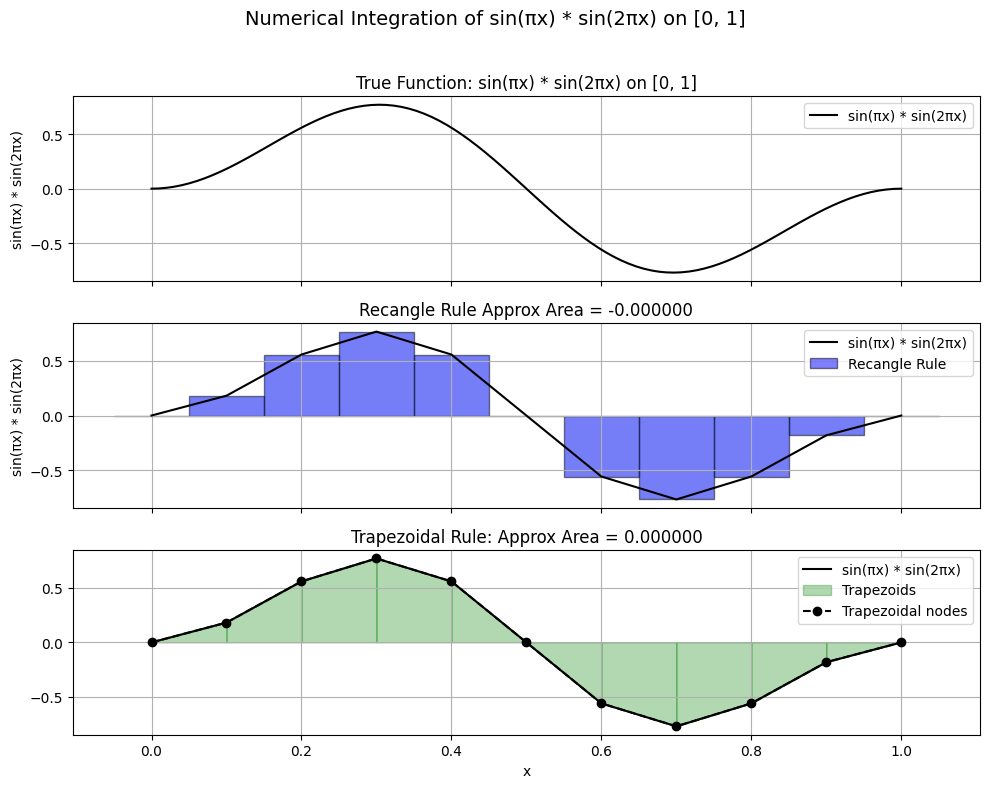

In [14]:
sin_product = lambda x: np.sin(np.pi * x) * np.sin(2 * np.pi * x)
plot_integration_methods(sin_product, 0, 1, 10, func_label='sin(πx) * sin(2πx)')

/var/folders/l5/rhh7z5c528b5hjwqy30m3vzr0000gn/T/ipykernel_32475/2787895227.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_trapz = np.trapz(f_vals, x)


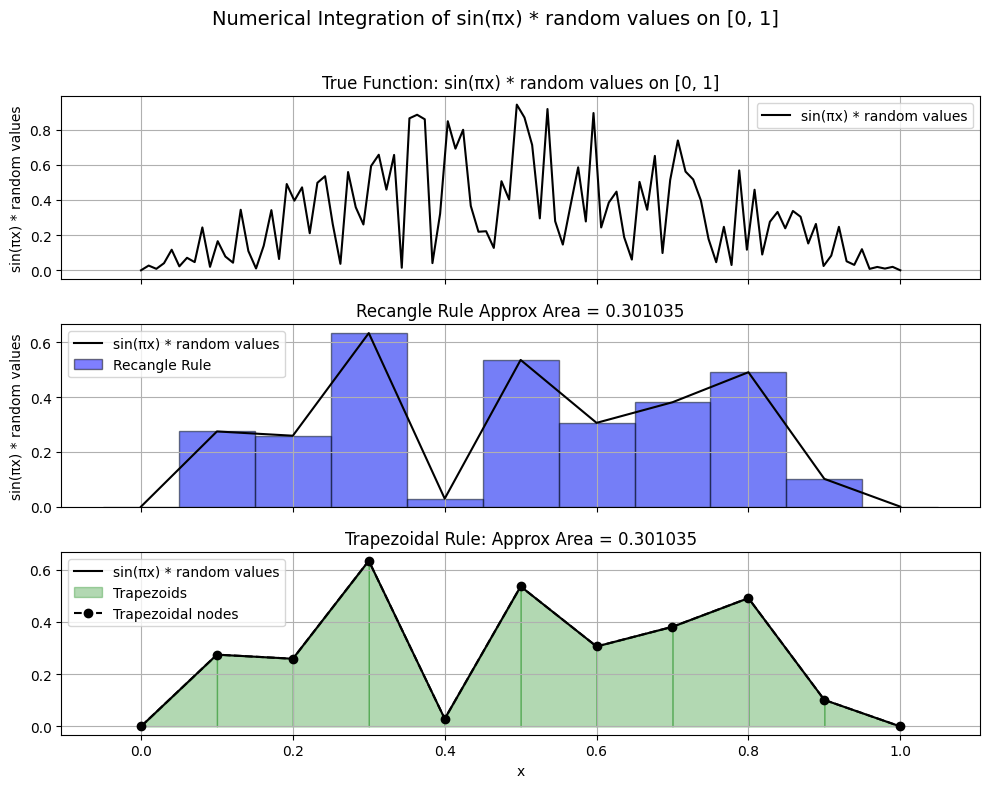

In [15]:
random_sin = lambda x: np.sin(np.pi * x) * np.random.rand(len(x))
plot_integration_methods(random_sin, 0, 1, 10, func_label='sin(πx) * random values')

/var/folders/l5/rhh7z5c528b5hjwqy30m3vzr0000gn/T/ipykernel_32475/2787895227.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_trapz = np.trapz(f_vals, x)


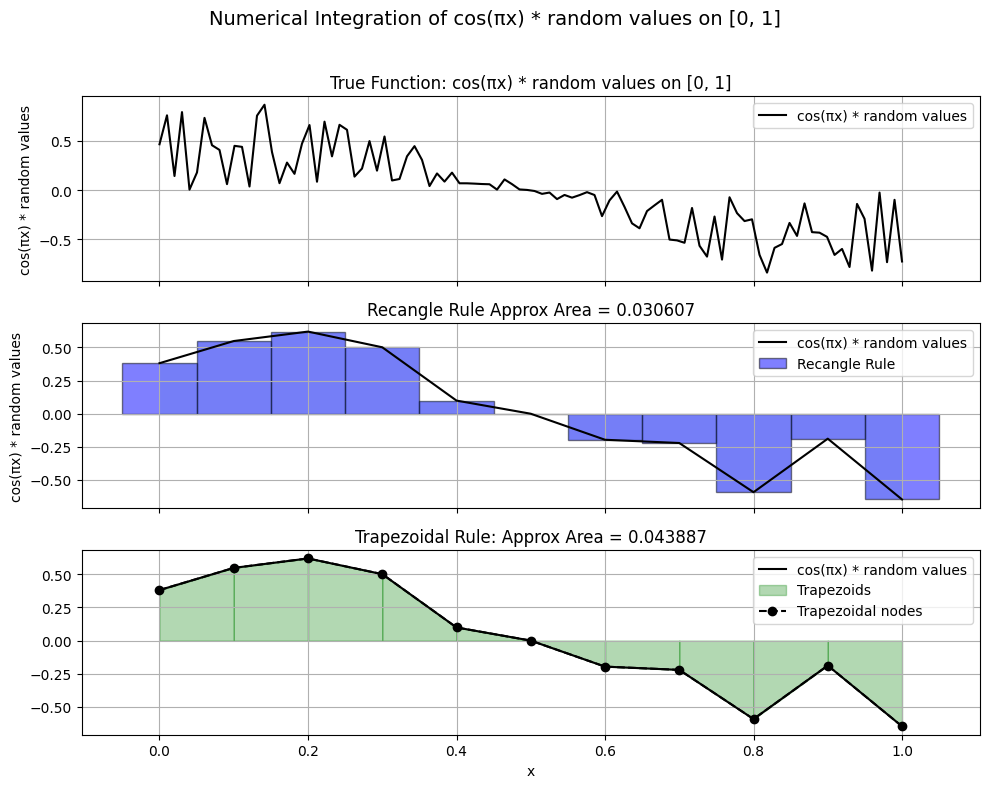

In [16]:
random_cos = lambda x: np.cos(np.pi * x) * np.random.rand(len(x))
plot_integration_methods(random_cos, 0, 1, 10, func_label='cos(πx) * random values')

In [17]:
nx       = 12                  # play with this
samples  = 5000
x_grid   = np.linspace(0, 1, nx+1)
dx       = 1/nx

# fake "u" and build an integrand that vanishes at the ends
u        = np.random.randn(samples, nx+1)
integrand= u * np.sin(np.pi*x_grid)      # ← zero at 0 and 1

rect = 2*dx*np.sum(integrand, axis=1)
trap = 2*np.trapz(integrand, x=x_grid, axis=1)

print("max(|rect-trap|) =", np.max(np.abs(rect-trap)))
# → O(1e-15)


max(|rect-trap|) = 5.551115123125783e-16


/var/folders/l5/rhh7z5c528b5hjwqy30m3vzr0000gn/T/ipykernel_32475/3375292090.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  trap = 2*np.trapz(integrand, x=x_grid, axis=1)


/var/folders/l5/rhh7z5c528b5hjwqy30m3vzr0000gn/T/ipykernel_32475/2958438221.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  approx_trapz = np.trapz(integrand, x)


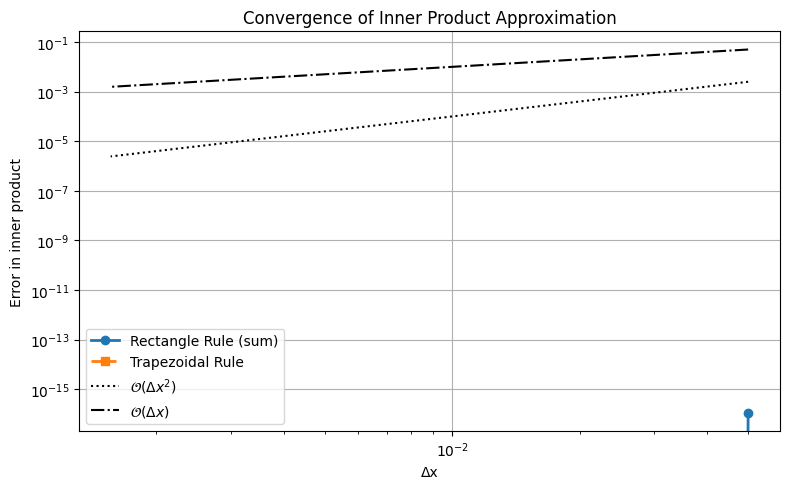

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function and basis to project onto
def u(x):
    return np.sin(np.pi * x)

def phi_n(x, n):
    return np.sin(n * np.pi * x)

# Exact value of the inner product <u, phi_n>
def exact_inner_product(n):
    if n == 1:
        return 0.5
    else:
        return 0.0

# Define values of N (number of segments)
Ns = [20, 40, 80, 160, 320, 640]
errors_sum = []
errors_trapz = []
dx_vals = []

n = 1  # mode to project onto

for N in Ns:
    x = np.linspace(0, 1, N + 1)
    dx = x[1] - x[0]
    dx_vals.append(dx)

    integrand = u(x) * phi_n(x, n)

    # Rectangle rule approximation
    approx_sum = np.sum(integrand) * dx

    # Trapezoidal rule approximation
    approx_trapz = np.trapz(integrand, x)

    # Exact result
    exact = exact_inner_product(n)

    # Errors
    errors_sum.append(abs(approx_sum - exact))
    errors_trapz.append(abs(approx_trapz - exact))

# Plotting error vs dx
plt.figure(figsize=(8, 5))
plt.loglog(dx_vals, errors_sum, 'o-', label='Rectangle Rule (sum)', linewidth=2)
plt.loglog(dx_vals, errors_trapz, 's--', label='Trapezoidal Rule', linewidth=2)
plt.loglog(dx_vals, [dx**2 for dx in dx_vals], 'k:', label=r'$\mathcal{O}(\Delta x^2)$')
plt.loglog(dx_vals, [dx for dx in dx_vals], 'k-.', label=r'$\mathcal{O}(\Delta x)$')

plt.xlabel('Δx')
plt.ylabel('Error in inner product')
plt.title('Convergence of Inner Product Approximation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
